# Geoelektrik Datenauswertung

## Lernziele

Nach der Bearbeitung dieses Jupyter-Notebooks ...

- kennst du die wichtigsten Befehle aus dem Modul `pandas` um Daten zu verarbeiten, 
- kannst du Daten in einem Diagramm darstellen, 
- kannst du das Diagramm nach deinen Wünschen gestalten
- und das Diagramm als Bilddatei speichern. 

Ausserdem erlernst du den Umgang mit Jupyter-Notebooks, einem interessanten und praktischem Dateiformat. Darin übst du Markdown zu schreiben und Python zu programmieren. 

## Das Modul `pandas`: wichtigste Befehle

Mit dem Modul `pandas` lassen sich grosse Datensätze filtern, analysieren und verarbeiten. Wir lernen hier einige wenige, grundlegende Befehle kennen. Bei vertieftem Interesse sei auf die [Dokumentation](https://pandas.pydata.org/) verwiesen, sowie auf den Online-Kurs von [Geo-Python](https://geo-python-site.readthedocs.io/en/latest/lessons/L5/overview.html). Auch KI kann hier sehr hilfreich sein.

Wir beginnen mit dem Laden der Module und der Messdaten. 

In [1]:
import pandas as pd 
from math import pi

input_file = "20251115_ert_kantipark.csv"
data = pd.read_csv(input_file)
data    # Ausgabe (funktioniert so nur in Jupyter-Notebooks -> verwende print(data) in Python-Programmen)

Nr.  U_batt  MN  AB      U      I
0     1      12   2   6  0.240  0.036
1     2      12   2  10  0.080  0.026
2     3      12   2  14  0.040  0.029
3     4      12   2  18  0.033  0.032
4     5      12   2  22  0.020  0.030
5     6      12   2  26  0.011  0.022
6     7      12   2  30  0.007  0.026
7     8      24   2  34  0.016  0.044
8     9      24   2  38  0.020  0.050
9    10      24   2  42  0.015  0.054
10   11      24   2   4  1.030  0.062
11   12      24   2   8  0.260  0.058
12   13      24   2  12  0.140  0.060
13   14      24   2  16  0.080  0.057
14   15      24   2  20  0.060  0.069
15   16      24   2  24  0.040  0.054
16   17      24   2  28  0.030  0.046
17   18      24   2  32  0.026  0.043
18   19      24   2  36  0.028  0.047
19   20      24   2  40  0.025  0.060
20   21      24   2  44  0.025  0.060

In `data` sind nun also alle unsere Daten gespeichert, und zwar in einer Tabelle. Auf eine einzelne Spalte können wir zugreifen, indem wir deren Bezeichnung in der Kopfzeile verwenden: 

In [2]:
data["U"]

0     0.240
1     0.080
2     0.040
3     0.033
4     0.020
5     0.011
6     0.007
7     0.016
8     0.020
9     0.015
10    1.030
11    0.260
12    0.140
13    0.080
14    0.060
15    0.040
16    0.030
17    0.026
18    0.028
19    0.025
20    0.025
Name: U, dtype: float64

Mit `data.loc[bedingung]` können Zeilen ausgewählt werden, die eine bestimmte Bedingung erfüllen (`loc` steht für Location). Als Bedingung werden Bool'sche Ausdrücke akzeptiert (z.B. `data["U"] > 0.02`, `data["AB"] == 16` etc.).

In [3]:
data.loc[data["AB"] == 16]  # Messung mit vorgegebenem Abstand von AB

Nr.  U_batt  MN  AB     U      I
13   14      24   2  16  0.08  0.057

In [4]:
data.loc[data["U"] > 0.02]  # Spannung über 20 mV

Nr.  U_batt  MN  AB      U      I
0     1      12   2   6  0.240  0.036
1     2      12   2  10  0.080  0.026
2     3      12   2  14  0.040  0.029
3     4      12   2  18  0.033  0.032
10   11      24   2   4  1.030  0.062
11   12      24   2   8  0.260  0.058
12   13      24   2  12  0.140  0.060
13   14      24   2  16  0.080  0.057
14   15      24   2  20  0.060  0.069
15   16      24   2  24  0.040  0.054
16   17      24   2  28  0.030  0.046
17   18      24   2  32  0.026  0.043
18   19      24   2  36  0.028  0.047
19   20      24   2  40  0.025  0.060
20   21      24   2  44  0.025  0.060

Die daraus entstehenden Teildatensätze können abgespeichert werden. Den Orignial-Datensatz solltest du nicht überschreiben. Besser gibst du dem Teildatensatz einen neuen Namen (z. B. `filtered_data`), sodass der Original-Datensatz erhalten bleibt. Im folgenden Code-Beispiel wird der Datensatz `filtered_data` immer kleiner, weil nur diejenigen Zeilen behalten werden, die das angegebene Kriterium erfüllen. Mit der Anweisung `data.loc[...]` wird auf einen Teil der Daten zugegriffen. Dieser Teil wird unter `filtered_data` gespeichert. In der nächsten Zeile wird auf einen Teil *davon* zugegriffen und `filtered_data` direkt wieder damit überschrieben. 

In [5]:
filtered_data = data.loc[data["U_batt"] == 24]               # Batteriespannung 24 V      
filtered_data = filtered_data.loc[filtered_data["U"] < 1]    # Spannung unter 1 V
filtered_data

Nr.  U_batt  MN  AB      U      I
7     8      24   2  34  0.016  0.044
8     9      24   2  38  0.020  0.050
9    10      24   2  42  0.015  0.054
11   12      24   2   8  0.260  0.058
12   13      24   2  12  0.140  0.060
13   14      24   2  16  0.080  0.057
14   15      24   2  20  0.060  0.069
15   16      24   2  24  0.040  0.054
16   17      24   2  28  0.030  0.046
17   18      24   2  32  0.026  0.043
18   19      24   2  36  0.028  0.047
19   20      24   2  40  0.025  0.060
20   21      24   2  44  0.025  0.060

*Übung: Überlege sinnvolle Filterkriterien und filtere die Daten danach.*

Solange wir aber noch nicht beurteilen können, welche Daten brauchbar sind und welche nicht, arbeiten wir mit dem gesamten Datensatz `data` weiter. 

Grosse Datensätze werden statistisch ausgewertet. Dafür gibt es in `pandas` eine ganze Reihe von Befehlen:

In [6]:
print( f'Durschnittsstrom:    {data["I"].mean():.3f} A' )   # :.3f sorgt dafür, dass 3 Nachkommastellen ausgegeben werden
print( f'Median von AB:       {data["AB"].median()} m' )
print( f'Kleinste Spannung:   {data["U"].min()} V' )
min_index = data["U"].idxmin()                              # finde den Index, der zur minimalen Spannung gehört ...
print( f'dazugehöriger Strom: {data.loc[min_index,"I"]}' )  # ... verwende ihn. 
# uvm. 

Durschnittsstrom:    0.046 A
Median von AB:       24.0 m
Kleinste Spannung:   0.007 V
dazugehöriger Strom: 0.026


*Übung: Gib den höchsten gemessenen Strom und die dazugehörige Spannung aus.*

Als nächstes berechnen wir fehlende Werte für unsere Auswertung und speichern sie in neuen Spalten. 



In [7]:
data["Messtiefe"] = data["AB"]/2 
data

Nr.  U_batt  MN  AB      U      I  Messtiefe
0     1      12   2   6  0.240  0.036        3.0
1     2      12   2  10  0.080  0.026        5.0
2     3      12   2  14  0.040  0.029        7.0
3     4      12   2  18  0.033  0.032        9.0
4     5      12   2  22  0.020  0.030       11.0
5     6      12   2  26  0.011  0.022       13.0
6     7      12   2  30  0.007  0.026       15.0
7     8      24   2  34  0.016  0.044       17.0
8     9      24   2  38  0.020  0.050       19.0
9    10      24   2  42  0.015  0.054       21.0
10   11      24   2   4  1.030  0.062        2.0
11   12      24   2   8  0.260  0.058        4.0
12   13      24   2  12  0.140  0.060        6.0
13   14      24   2  16  0.080  0.057        8.0
14   15      24   2  20  0.060  0.069       10.0
15   16      24   2  24  0.040  0.054       12.0
16   17      24   2  28  0.030  0.046       14.0
17   18      24   2  32  0.026  0.043       16.0
18   19      24   2  36  0.028  0.047       18.0
19   20      24   2  40  0.025  0.060       20.0
20   21      24   2  44  0.025  0.060       22.0

*Übung: Berechne den geometrischen Faktor K und den spezifischen Widerstand rho und speichere die Werte in je eine neue Spalte. Hinweis: Wir haben im allerersten Code-Block die Zahl pi importiert. Du kannst sie einfach verwenden (z. B. `u = 2*pi*r`).*

Zuletzt müssen wir die Daten sortieren, damit wir sie später reibungslos darstellen können. Dies erledigt der folgende Code-Block.

In [8]:
data = data.sort_values(by="Messtiefe")
data

Nr.  U_batt  MN  AB      U      I  Messtiefe
10   11      24   2   4  1.030  0.062        2.0
0     1      12   2   6  0.240  0.036        3.0
11   12      24   2   8  0.260  0.058        4.0
1     2      12   2  10  0.080  0.026        5.0
12   13      24   2  12  0.140  0.060        6.0
2     3      12   2  14  0.040  0.029        7.0
13   14      24   2  16  0.080  0.057        8.0
3     4      12   2  18  0.033  0.032        9.0
14   15      24   2  20  0.060  0.069       10.0
4     5      12   2  22  0.020  0.030       11.0
15   16      24   2  24  0.040  0.054       12.0
5     6      12   2  26  0.011  0.022       13.0
16   17      24   2  28  0.030  0.046       14.0
6     7      12   2  30  0.007  0.026       15.0
17   18      24   2  32  0.026  0.043       16.0
7     8      24   2  34  0.016  0.044       17.0
18   19      24   2  36  0.028  0.047       18.0
8     9      24   2  38  0.020  0.050       19.0
19   20      24   2  40  0.025  0.060       20.0
9    10      24   2  42  0.015  0.054       21.0
20   21      24   2  44  0.025  0.060       22.0

## Diagramme erstellen

Nun haben wir die Daten eingelesen und zugeschnitten. Damit wir uns den Temperaturverlauf vorstellen können, stellen wir ihn grafisch dar:

In [9]:
data.plot(x="Messtiefe", y="U")

<AxesSubplot: xlabel='Messtiefe'>

Das Diagramm zeigt die Spannung in Abhängigkeit von der Messtiefe. Wir versuchen das Diagramm ansprechend zu gestalten. Dazu dienen diverse Optionen, die wir dem `plot`-Befehl übergeben. Das ausgegebene Diagramm kannst du bei Bedarf per Mausclick (oben rechts über der Abbildung) speichern. 

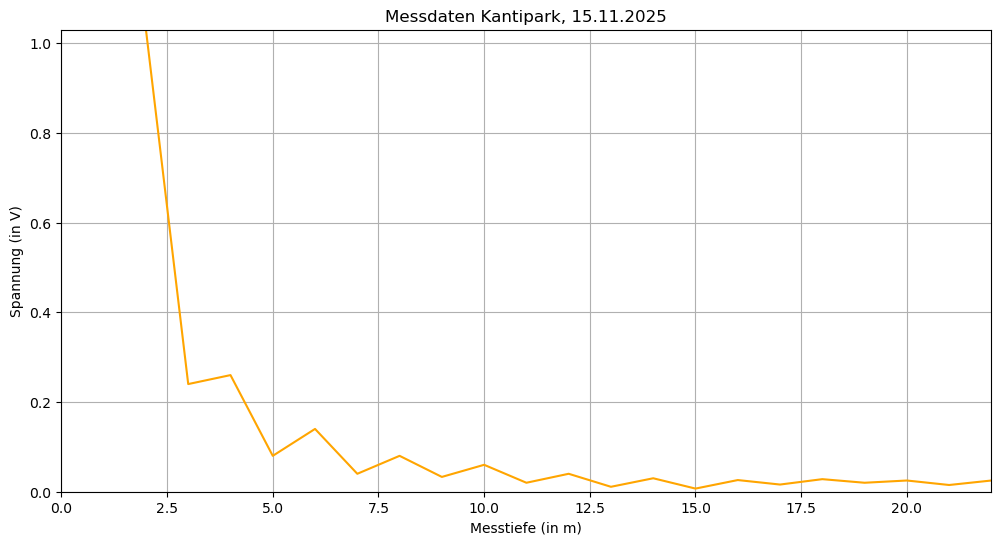

In [10]:
n = len(data)
ax = data.plot(
    x="Messtiefe",              # x-Werte
    y="U",                      # y-Werte
    xlim=[0,data["Messtiefe"].max()],    # Grenzen des Bereichs auf der x-Achse
    ylim=[0,data["U"].max()],   # Grenzen des Bereichs auf der y-Achse
    style="orange",             # Stil (bzw. Farbe) der Linie
    lw="1.5",                  # "line width"
    grid=True,                  # Gitterlinien
    legend=False,               # Legende
    title="Messdaten Kantipark, 15.11.2025",   # Titel
    xlabel="Messtiefe (in m)",             # Beschriftung der x-Achse
    ylabel="Spannung (in V)",   # Beschriftung der y-Achse
    figsize=(12, 6),            # Grösse (in Zoll) der Abbildung 
)
# ax.invert_yaxis()

Übung:
1. Statt der Spannung solltest du den spezifischen Widerstand in Abhängigkeit von der Messtiefe zeigen. 
2. Vertausche die Achsen, sodass die Messtiefe nach unten, der spezifische Widerstand nach rechts zeigt (vgl. Praktikumsanleitung). Hinweis: Der auskommentierte Befehl in der letzten Zeile wird hilfreich sein. 
3. Gestalte das Diagramm nach deinen Wünschen. 
4. Gibt es Ausreisser in den Daten? Das sind Werte, die unnatürlich hoch oder tief sind. Filtere sie raus, bevor du die Daten grafisch darstellst. 

## Zusammenfassung

Du hast die wichtigsten Befehle des Moduls `pandas` kennen gelernt. Sie dienen dazu, Daten einzulesen, auszuwerten, zu filtern und schliesslich grafisch darzustellen. Das Auswerten und Darstellen von Daten ist ein wesentlicher Bestandteil des wissenschaftlichen Arbeitens. Ich hoffe, du kannst die hier erlernten Kenntnisse in deiner Maturaarbeit oder im Studium wieder verwenden. 

## Bericht

Nun ist es an dir. Aus diesem Jupyter-Notebook soll direkt dein Bericht entstehen. Gehe dafür wie folgt vor: 

1. Speichere eine Kopie dieses Jupyter-Notebooks, z. B. unter dem Namen `ert_bericht_name_vorname.ipynb`.
2. Lösche sämtliche Blöcke, die du nicht brauchst. 
3. Verwende bestehende oder neue Markdown-Blöcke um deinen Bericht zu schreiben. 
4. Verwende die bestehenden Python-Blöcke um deine Daten auszuwerten. 
5. (Mit der VS Code Erweiterung nb2pdf kannst du deinen Bericht als PDF exportieren.)